<a href="https://colab.research.google.com/github/jonathjd/rhr-linear-regression/blob/main/rhr_hrv_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import libraries

In [ ]:
#Import csv file

from google.colab import files
uploaded = files.upload()

Saving q1_data.csv to q1_data.csv


In [ ]:
df = pd.read_csv('q1_data.csv')

# Dataset is now stored in a Pandas Dataframe

In [ ]:
df.head()

,date,body_weight,calories,protein,carbs,fats,steps,heart_rate_variability,resting_heart_rate,total_TIB,rem_sleep,deep_sleep,total_rest_sleep,%total_TIB
0,8/31/2020,245.0,2300,175,228,80,6841,61.0,61.0,7.33,1.10,1.63,2.73,0.37
1,9/1/2020,239.0,2335,178,228,80,12200,49.0,55.0,6.97,0.82,1.50,2.32,0.33
2,9/2/2020,238.0,2600,200,231,95,6157,46.0,58.0,6.87,0.30,1.00,1.30,0.19
3,9/3/2020,238.5,2400,168,250,88,4640,38.0,61.0,7.90,0.33,1.43,1.76,0.22
4,9/4/2020,238.6,2360,170,262,76,5298,39.0,63.0,7.72,0.90,1.10,2.00,0.26


In [ ]:
df.count()

date                      68
body_weight               68
calories                  68
protein                   68
carbs                     68
fats                      68
steps                     68
heart_rate_variability    67
resting_heart_rate        67
total_TIB                 67
rem_sleep                 67
deep_sleep                67
total_rest_sleep          67
%total_TIB                67
dtype: int64

In [ ]:
#Drop na values
df.dropna(inplace=True)

#Check dataframe
df.count()

date                      67
body_weight               67
calories                  67
protein                   67
carbs                     67
fats                      67
steps                     67
heart_rate_variability    67
resting_heart_rate        67
total_TIB                 67
rem_sleep                 67
deep_sleep                67
total_rest_sleep          67
%total_TIB                67
dtype: int64

In [ ]:
#Look at general descriptive statistics with the data
df.describe()

,body_weight,calories,protein,carbs,fats,steps,heart_rate_variability,resting_heart_rate,total_TIB,rem_sleep,deep_sleep,total_rest_sleep,%total_TIB
count,67.000000,67.000000,67.000000,67.000000,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,237.680597,2624.865672,199.641791,285.044776,74.61194,7819.432836,52.000000,57.671642,8.077015,1.378463,1.541045,2.919507,0.361493
std,2.157878,293.858959,25.751553,68.895712,18.70987,3252.790402,9.537804,4.072778,0.873105,0.641806,0.365448,0.819329,0.095255
min,232.800000,2000.000000,160.000000,195.000000,44.00000,1252.000000,28.000000,52.000000,6.530000,0.280000,0.870000,1.230000,0.170000
25%,236.600000,2400.000000,180.500000,230.500000,62.00000,5593.000000,46.500000,55.000000,7.455000,0.850000,1.250000,2.345000,0.300000
50%,237.800000,2600.000000,196.000000,266.000000,70.00000,8385.000000,53.000000,57.000000,7.800000,1.380000,1.570000,2.780000,0.360000
75%,239.000000,2861.000000,220.500000,342.000000,81.50000,10318.000000,59.000000,59.000000,8.805000,1.840000,1.775000,3.500000,0.440000
max,245.000000,3500.000000,250.000000,475.000000,126.00000,13475.000000,72.000000,75.000000,11.430000,3.120000,2.750000,5.120000,0.600000


In [ ]:
#Look at correlation within the data
df.corr()

,body_weight,calories,protein,carbs,fats,steps,heart_rate_variability,resting_heart_rate,total_TIB,rem_sleep,deep_sleep,total_rest_sleep,%total_TIB
body_weight,1.000000,-0.288604,-0.219948,-0.264697,0.167449,-0.163693,0.085323,0.058742,-0.089321,-0.225564,-0.068201,-0.207111,-0.204778
calories,-0.288604,1.000000,0.609064,0.757108,-0.095451,0.431952,0.215647,-0.262513,-0.272188,0.133489,-0.148509,0.038326,0.179277
protein,-0.219948,0.609064,1.000000,0.332388,-0.157812,0.263066,0.214244,-0.204834,-0.113160,0.245474,-0.052864,0.168708,0.212333
carbs,-0.264697,0.757108,0.332388,1.000000,-0.581584,0.265708,0.184438,-0.268908,-0.338482,0.129419,-0.226567,0.000322,0.180672
fats,0.167449,-0.095451,-0.157812,-0.581584,1.000000,-0.037452,-0.073783,0.149617,0.296666,-0.109923,0.269542,0.034118,-0.101434
steps,-0.163693,0.431952,0.263066,0.265708,-0.037452,1.000000,0.476580,-0.292589,-0.318105,0.001304,-0.129688,-0.056824,0.085283
heart_rate_variability,0.085323,0.215647,0.214244,0.184438,-0.073783,0.476580,1.000000,-0.604963,-0.314347,0.233616,-0.241168,0.075430,0.221972
resting_heart_rate,0.058742,-0.262513,-0.204834,-0.268908,0.149617,-0.292589,-0.604963,1.000000,0.341272,-0.095472,0.117302,-0.022466,-0.177200
total_TIB,-0.089321,-0.272188,-0.113160,-0.338482,0.296666,-0.318105,-0.314347,0.341272,1.000000,0.120258,0.651502,0.384793,-0.024595
rem_sleep,-0.225564,0.133489,0.245474,0.129419,-0.109923,0.001304,0.233616,-0.095472,0.120258,1.000000,0.268246,0.902978,0.912204


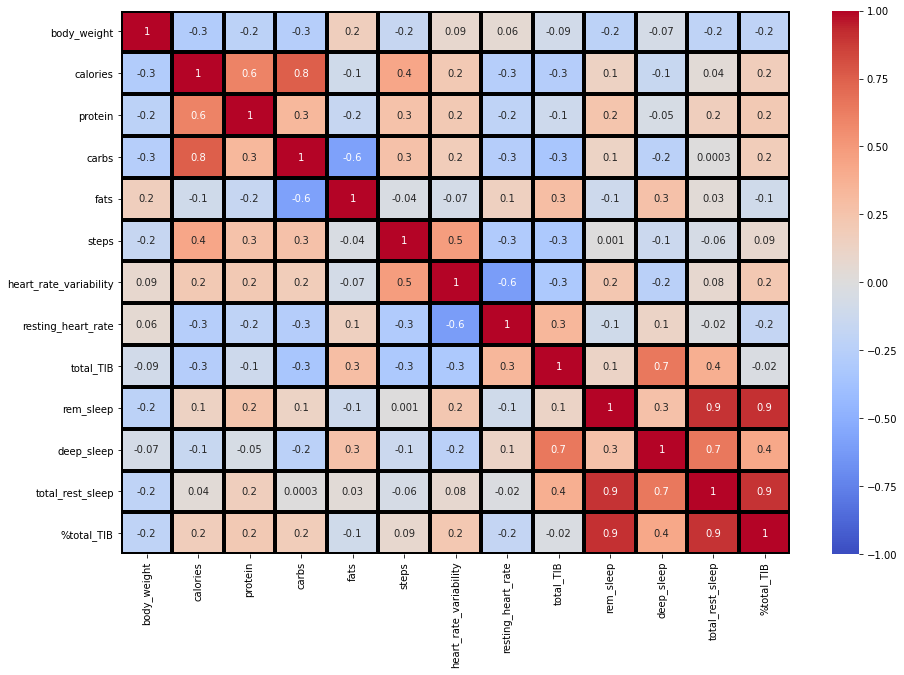

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(df.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap = 'coolwarm', linewidths=3, linecolor='black', ax=ax)

#Correlation matrix using seaborn

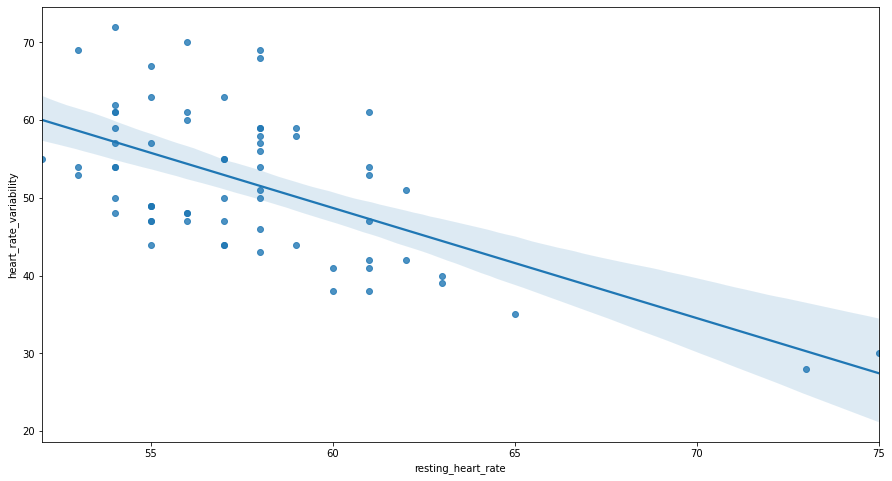

In [ ]:
# Plot variables with high association with line of best fit

plt.figure(figsize = (15,8))
sns.regplot(data = df, x = 'resting_heart_rate', y = 'heart_rate_variability')

In [ ]:
X = df['resting_heart_rate']
Y = df['heart_rate_variability']

#Can we predict heart rate variability with resting heart rate?
np.polyfit(X, Y, deg = 1)

array([ -1.41672802, 133.70503067])

In [ ]:
#Sample Data

potential_rhr = np.linspace(40,80,70)

predicted_hrv = -1.41672802 * potential_rhr + 133.70503067

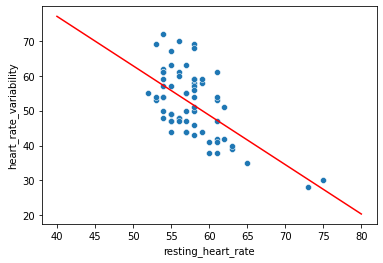

In [ ]:
#plot regression line

sns.scatterplot(x = 'resting_heart_rate', y = 'heart_rate_variability', data = df)
plt.plot(potential_rhr,predicted_hrv, color = 'red')

In [ ]:
#sample prediction

rhr = 66
predicted_hrv = -1.41672802 * rhr + 133.70503067

# Predicted heart rate variability on a day where my average resting heart rate is 66 beats per minute
predicted_hrv

# On a day where my average resting heart rate is 66 beats per minute, 
# my predicted average heart rate variability is 40 ms (milliseconds)

40.200981350000006